# PW 1 - Markovian models  
Sampling of Markovian models.

**NAME:** 

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

## Part 1 - Ising model

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

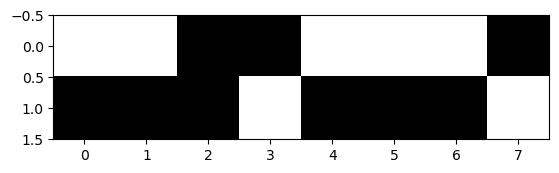

In [14]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)


### Q1

For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.

### A1

$$U(x) = \sum_{c \in \mathcal{C}} V_c(x)$$

With the image generated, one have : 
$$U(x) = 5\beta + 7\beta = 12\beta$$




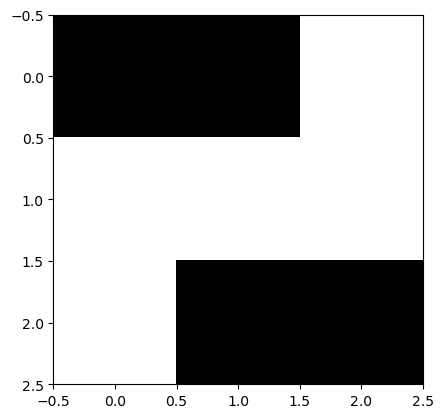

In [112]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

### Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an **8-neighborhood**).

### A2

$$\Pr(X_s = x_s \mid V_s) = \frac{1}{Z^s} \exp (- U_s(x_s, V_s))$$

$\Pr(X_s = 0 \mid (0,1,1,0,0,1,1,0)) = \frac{e^{-4\beta}}{Z_s} = \Pr(X_s = 1 \mid (0,1,1,0,0,1,1,0)) \implies Z_s = e^{-4\beta}$  

Hence, 

$$\Pr(X_s = 0 \mid (0,1,1,0,0,1,1,0)) = \Pr(X_s = 1 \mid (0,1,1,0,0,1,1,0)) = \frac{1}{2}$$

So it's equally likely.


## Part 2 - Gibbs sampler

Programming the Gibbs sampler and drawing samples of Markovian models

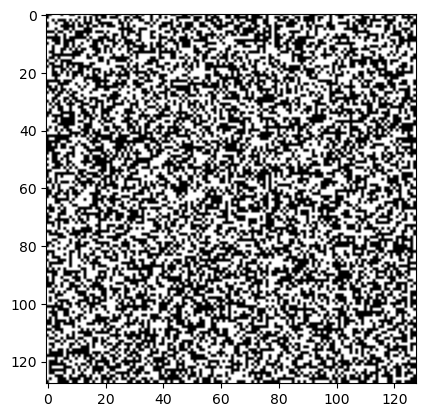

In [5]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function

Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling with respect to the previously described model and in 4-connexity) and the value of the regularization parameter.

In [6]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=(int(im_bin[i1, j]) + int(im_bin[i2, j]) + int(im_bin[i,j1]) + int(im_bin[i,j2]))*beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= 4*beta_reg - Ureg0
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

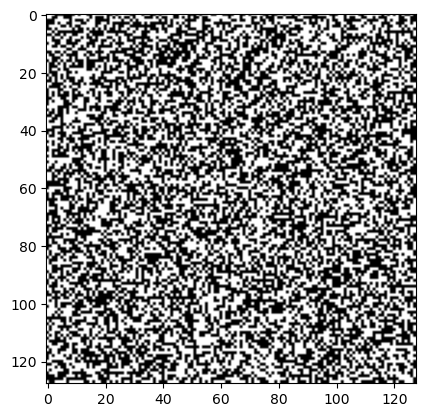

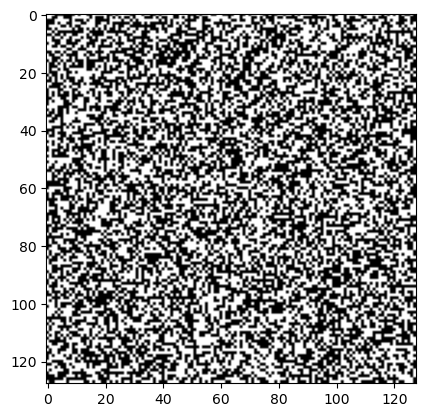

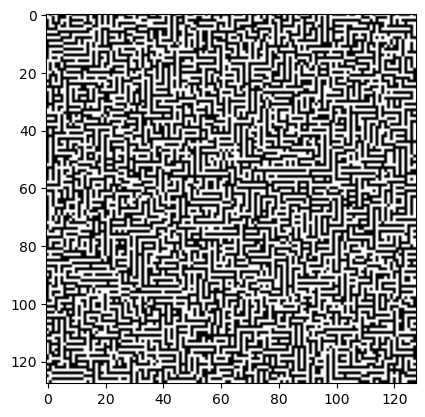

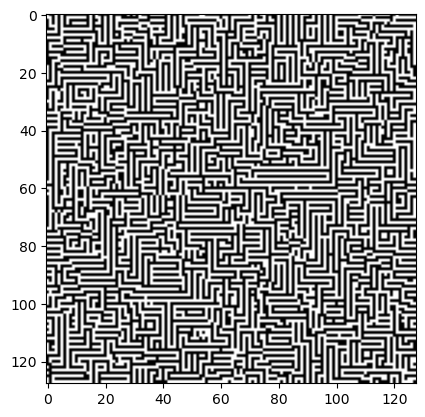

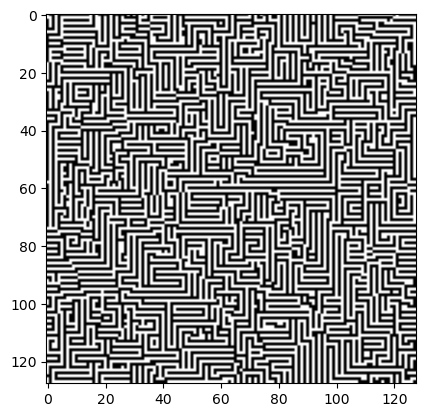

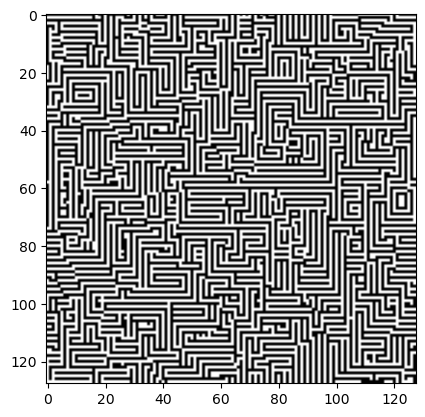

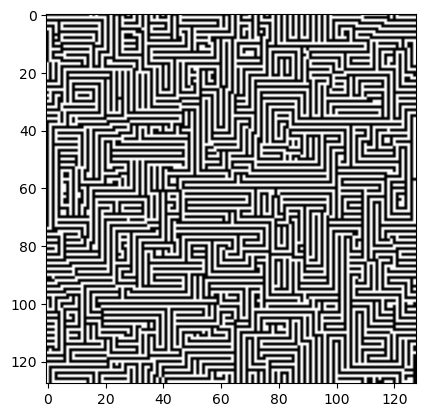

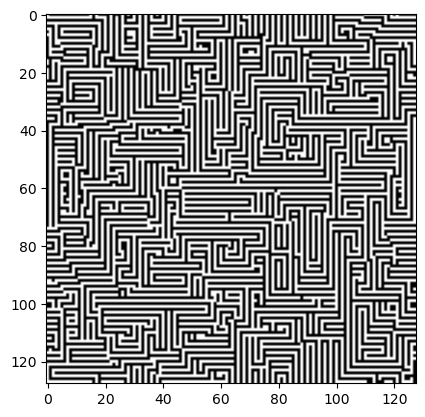

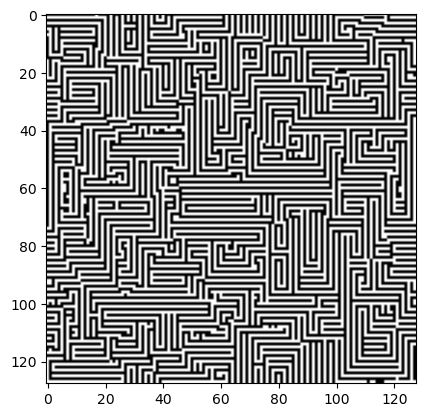

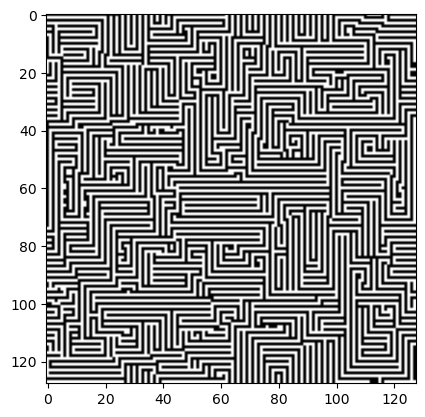

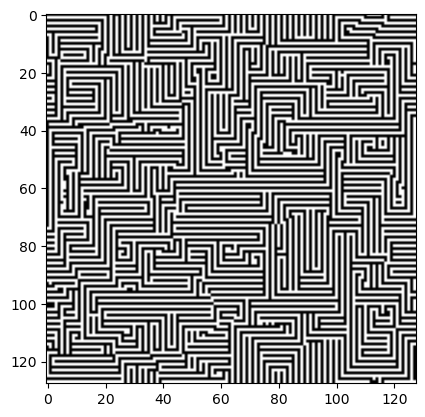

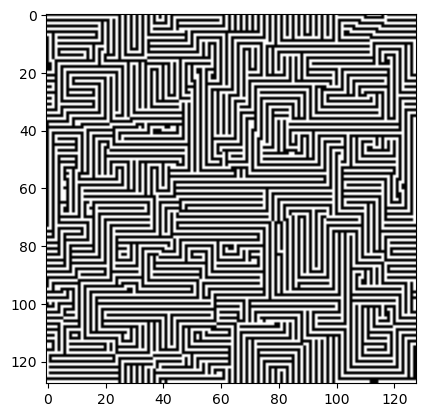

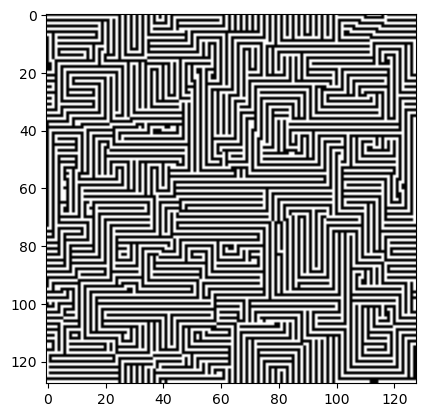

In [113]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=-10

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()


### Q3

Run the program several times. Do you still get the same image? Comment on this.

### A3

On n'obtient pas à chaque fois la même image à la fin. Comme on fait intervenir de l'aléa, ce résultat est parfaitement logique. On essaye de connexifier des parties de l'image.


### Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

### A4

Comme on peut le voir, plus $\beta$ augmente moins il y a de contours, donc plus les zones conexes sont grandes.

### Q5
Which image minimizes the overall energy for this model?

### A5

- Lorsque $\beta > 0$ l'image qui minimise l'énergie est celle qui fait intervenir le moins de changement d'état, donc l'image constante (blanche ou noire)
- À l'inverse, pour $\beta < 0$, l'image qui minime l'énergie est celle avce le plus de changement d'état, donc un damier, alternant noir et blan ou blanc et noir.



### Q6

Change $\beta$ and give it a negative value. Describe the result and justify it.

### A6

On obtient une image plus hétérogène, qui est déconexifiée. On observe des lignes, comme un labyrinthe 

## Part 2 - Non-isotropic model

We now work in **8-neighborhood**, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.

* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.

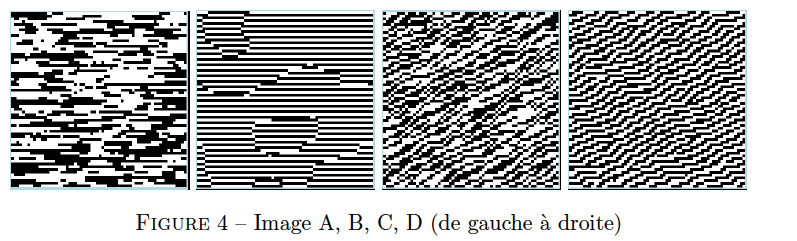

### Q7

Propose the clique potentials that allow us to obtain these realizations.
Additionally, modify your program to obtain the results at each step (you can copy and paste the previous cells). 

### A7

| Potential | horiz.<br>$V_c(0,1)$<br>$V_c(1,0)$ | horiz.<br>$V_c(0,0)$<br>$V_c(1,1)$ | vertical<br>$V_c(0,1)$<br>$V_c(1,0)$ | vertical<br>$V_c(0,0)$<br>$V_c(1,1)$ | diag $(+\frac{\pi}{4})$<br>$V_c(0,1)$<br>$V_c(1,0)$ | diag $(+\frac{\pi}{4})$<br>$V_c(0,0)$<br>$V_c(1,1)$ | diag $(+\frac{3\pi}{4})$<br>$V_c(0,1)$<br>$V_c(1,0)$ | diag $(+\frac{3\pi}{4})$<br>$V_c(0,0)$<br>$V_c(1,1)$ |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| **Image A** | 0 | **-1** | 0 | 0 | 0 | 0 | 0 | 0 |
| **Image B** | 0 | **-1** | 0 | **+1** | 0 | 0 | 0 | 0 |
| **Image C** | 0 | **-1** | 0 | **+1** | 0 | **-1** | 0 | 0 |
| **Image D** | 0 | **-1** | 0 | **+1** | 0 | **-1** | 0 | **+1** |  

L'idée pour le code est de réutiliser les fonction que l'on avait précédemment, mais au lieu de mettre un seul $\beta$ pour les différentes énergies, ici on en mets des différents pour coller au tableau. Avant le modèle était isotrope, maintenant il est anisotrope c'est à dire qu'il diffère selon que la direction du clic.


In [129]:
def echan(im_bin, beta_h, beta_v, beta_d1, beta_d2):
    rows, cols = im_bin.shape
    for i in range(rows):
        for j in range(cols):
            i1, i2 = (i - 1) % rows, (i + 1) % rows
            j1, j2 = (j - 1) % cols, (j + 1) % cols
            
            # Energie pour etat 0
            Ureg0 = beta_h * ((1 - im_bin[i, j1]) + (1 - im_bin[i, j2]))
            Ureg0 += beta_v * ((1 - im_bin[i1, j]) + (1 - im_bin[i2, j]))
            Ureg0 += beta_d1 * ((1 - im_bin[i1, j2]) + (1 - im_bin[i2, j1]))
            Ureg0 += beta_d2 * ((1 - im_bin[i1, j1]) + (1 - im_bin[i2, j2]))
            
            p0 = math.exp(-Ureg0)
            
            # Energie pour etat 1
            Ureg1 = beta_h * (im_bin[i, j1] + im_bin[i, j2])
            Ureg1 += beta_v * (im_bin[i1, j] + im_bin[i2, j])
            Ureg1 += beta_d1 * (im_bin[i1, j2] + im_bin[i2, j1])
            Ureg1 += beta_d2 * (im_bin[i1, j1] + im_bin[i2, j2])
            
            p1 = math.exp(-Ureg1)
            
            if (p0 + p1 != 0.):
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0.
                else:
                    im_bin[i, j] = 1.
    return im_bin

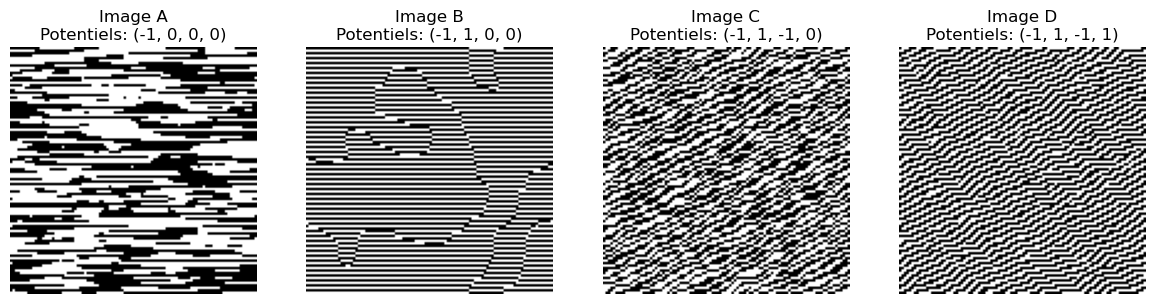

In [130]:
sh = [100, 100]
nb_steps = 60  # Augmenté pour laisser les lignes se former
scale = 3.0    # FACTEUR CLE : On amplifie les potentiels pour durcir les contraintes

# On multiplie les valeurs théoriques (-1, 1) par le scale
configs = [
    {"name": "Image A", "params": (-1 * scale, 0, 0, 0)},
    {"name": "Image B", "params": (-1 * scale, 1 * scale, 0, 0)},
    {"name": "Image C", "params": (-1 * scale, 1 * scale, -1 * scale, 0)},
    {"name": "Image D", "params": (-1 * scale, 1 * scale, -1 * scale, 1 * scale)}
]

plt.figure(figsize=(12, 3))

for idx, config in enumerate(configs):
    # Initialisation aléatoire
    im_bin = np.random.randint(0, 2, sh).astype(float)
    
    bh, bv, bd1, bd2 = config["params"]
    
    # Simulation
    for n in range(nb_steps):
        echan(im_bin, bh, bv, bd1, bd2)
    
    # Affichage
    plt.subplot(1, 4, idx + 1)
    plt.imshow(im_bin, cmap='gray')
    # J'affiche les valeurs "brutes" dans le titre pour référence
    original_params = tuple(int(p/scale) for p in config["params"])
    plt.title(f"{config['name']}\nPotentiels: {original_params}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Q8

Modify your program to define an Ising model with  diagonal attractive potentials only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in both diagonal directions ($\pi/4$ and $3\pi/4$ directions). Describe and comment on the result. 

### A8

On observe un damier en fond et des composantes connexes, avec des contours en escallier (du notamment au fond en damier).


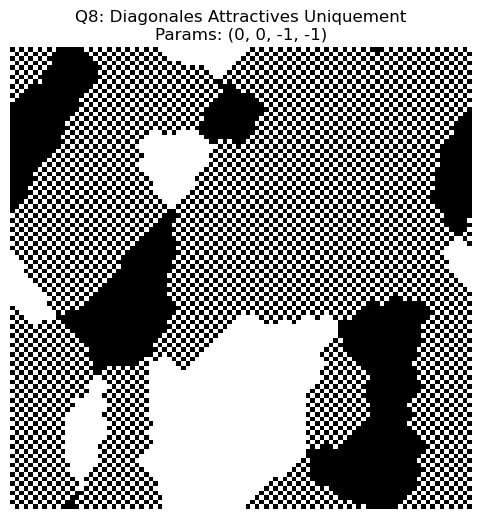

In [ ]:
scale = 3.0
beta_h = 0
beta_v = 0
beta_d1 = -1 * scale  # Attraction Diagonale 
beta_d2 = -1 * scale  # Attraction Diagonale 

# Initialisation
im_bin_q8 = np.random.randint(0, 2, sh).astype(float)

# Simulation
plt.figure(figsize=(6, 6))
for n in range(100):
    echan(im_bin_q8, beta_h, beta_v, beta_d1, beta_d2)

# Affichage
plt.imshow(im_bin_q8, cmap='gray')
plt.title(f"Q8: Diagonales Attractives Uniquement\nParams: (0, 0, -1, -1)")
plt.axis('off')
plt.show()